In [1]:
import sys
sys.path.insert(0, '../util')
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from sc import *
from plot import *
from tqdm import tqdm
from alg import hstar, k_rollout, bhattacharya, almost_equal
from pqdict import pqdict
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

In [127]:
colors = ['#4daf4a', '#984ea3', '#f781bf', '#ff7f00', '#377eb8', '#ff7f00', '#a65628', '#999999', '#e41a1c', '#dede00']

def get_hole_coords(n_side, row_col_coords):
    delta = 2 / (n_side - 1)
    return np.array([np.array(x) * delta - (1, 1) for x in row_col_coords])

n_side = 9
SC = SimplicialComplex(n_side, False, False, True)

node_coords = [(2, 2), (2, n_side - 3), (n_side-3, n_side-3), (n_side - 3, 2)]
hole_locs = get_hole_coords(n_side, node_coords)
dx = 2 / (n_side - 1)
SC.make_holes(hole_locs, dx)

<AxesSubplot:>

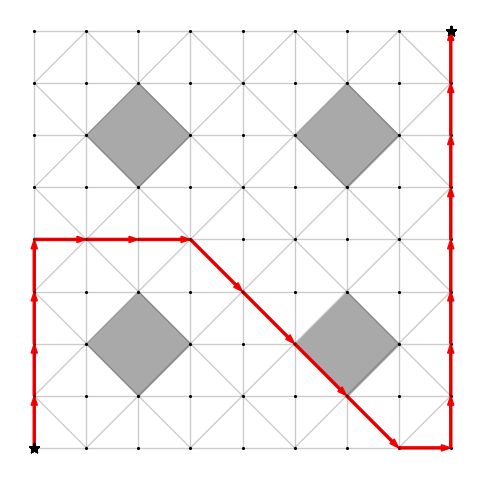

In [128]:
ref_path = path_from_coords(SC, [(-1, -1), (-1, 0), (1, -1), (1,1)])
plot_path(SC, ref_path, 'red', None, None)

In [129]:
res, others = bhattacharya(SC, ref_path, others=True)

In [130]:
others

[0-9-19-29-39-49-59-69-79-80,
 0-1-11-21-31-41-51-61-71-80,
 0-9-19-29-39-49-50-51-61-71-80,
 0-1-11-21-31-41-50-59-69-79-80,
 0-9-18-27-36-45-55-65-75-76-77-78-79-80,
 0-1-2-3-4-5-15-25-35-44-53-62-71-80,
 0-1-11-21-30-39-47-55-65-66-67-68-69-79-80,
 0-9-18-27-36-45-55-65-57-58-59-51-61-71-80,
 0-1-2-3-4-5-15-25-33-42-51-59-69-79-80]

In [136]:
best_paths = []
alphas = np.linspace(0, 1, 10)
candidates = others+[res]

for alpha in alphas:
    path_costs = [path.cost(ref_path.proj, alpha) for path in candidates]
    best_idx = np.argmin(path_costs)
    best_paths.append(candidates[best_idx])

best_best_paths = []
trans_alphas = [0]
for path_i in best_paths:
    dont_add = False
    for path_j in best_best_paths[::-1]:
        if path_i.proj_diff(path_j) < 1e-10:
            dont_add = True
            break
    if not dont_add:
        best_best_paths.append(path_i)
        
best_paths = best_best_paths

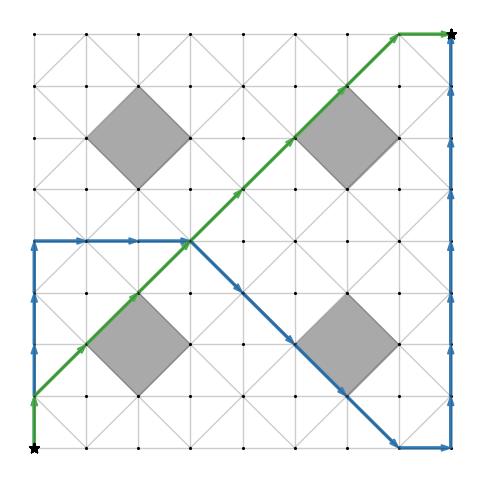

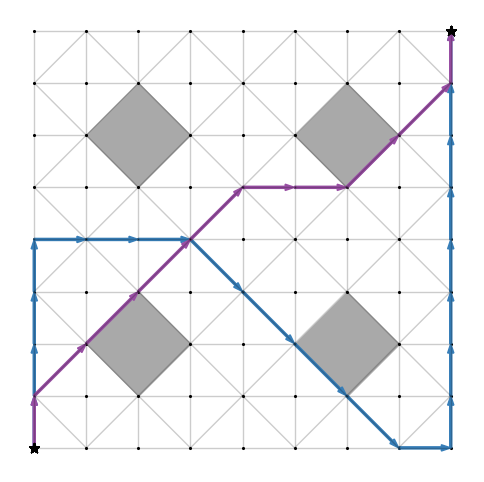

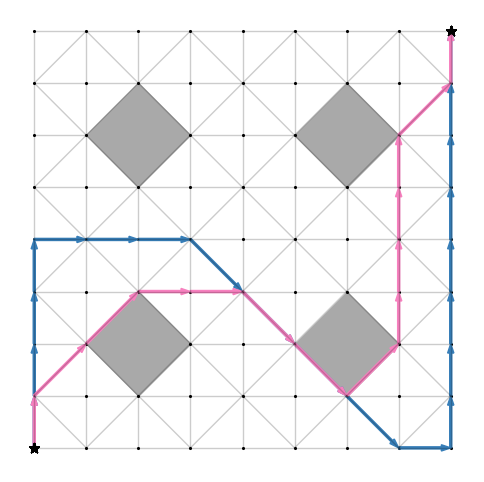

In [140]:
for i, path in enumerate(best_paths):
    several_path_plot(SC, [ref_path, path], colors = [colors[4], colors[i]])
    

<AxesSubplot:>

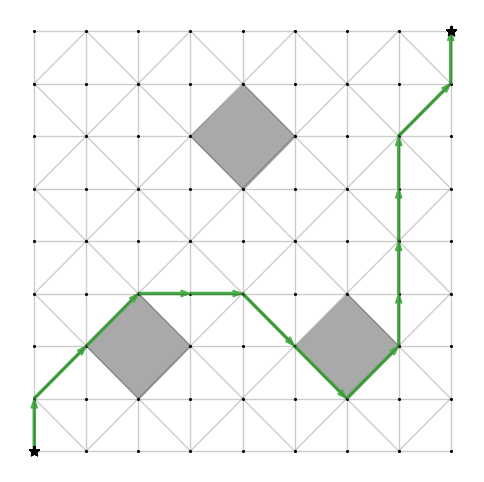

In [84]:
several_path_plot(SC, [res], colors=colors)